In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium

import warnings
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 공시지가 제곱미터당 원화
# 임야 - 숲, 대 - 집 지을 수 있는 곳
# 주위환경, 지세명, 형상명, 도로교통 4개가 중요한 변수
# 남향

In [13]:
df = pd.read_csv('./src/2022 표준지 공시지가.csv')
# df = pd.read_csv('/users/jjong/desktop/vscode/cwnu_ict/src/2022 표준지 공시지가.csv')
df

C:\Users\PC\AppData\Local\Temp\ipykernel_13108\2486275118.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./src/2022 표준지 공시지가.csv')


,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,4,11110,10100,1,0008,9,서울특별시,종로구,청운동 8-9,대,...,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,5,11110,10100,1,0008,15,서울특별시,종로구,청운동 8-15,대,...,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540045,4367,50130,32026,1,1582,0,제주특별자치도,서귀포시,표선면 토산리 1582,전,...,NaN,과수원,지방도주변 농경지대,평지,사다리형,맹지,18500,토산1리노인복지회관,북측 원거리,NaN
540046,4368,50130,32026,1,1629,1,제주특별자치도,서귀포시,표선면 토산리 1629-1,전,...,NaN,전,순수 농경지대,평지,사다리형,소로한면,61000,소소름,남동측 인근,NaN
540047,4369,50130,32026,1,1766,1,제주특별자치도,서귀포시,표선면 토산리 1766-1,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,세로(가),49500,토산1리사무소,북서측 인근,NaN
540048,4370,50130,32026,1,1876,0,제주특별자치도,서귀포시,표선면 토산리 1876,과수원,...,NaN,과수원,지방도주변 농경지대,완경사지,부정형,중로한면,89000,토산1리사무소,남서측 인근,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

In [15]:
# 지역 한정하기
df = df[df['시도명'] == '경상남도']
df

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
465236,1,48121,10100,1,0028,0000,경상남도,창원의창구,북동 28,대,...,NaN,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향
465237,2,48121,10100,1,0035,0000,경상남도,창원의창구,북동 35,대,...,NaN,단독주택,기존 주택지대,평지,사다리형,세각(불),657000,창원향교,남서측인근,남향
465238,3,48121,10100,1,0072,0000,경상남도,창원의창구,북동 72,대,...,NaN,단독주택,기존 주택지대,평지,부정형,세로(불),754000,북동공설시장,동측인근,북서향
465239,4,48121,10100,1,0090,0002,경상남도,창원의창구,북동 90-2,대,...,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,909500,북동공설시장,동측인근,남향
465240,5,48121,10100,1,0100,0002,경상남도,창원의창구,북동 100-2,대,...,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,943500,북동공설시장,동측인근,남향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529420,3901,48890,46037,1,1309,0,경상남도,합천군,용주면 가호리 1309,전,...,NaN,전,순수 농경지대,완경사지,부정형,맹지,9150,월평동마을,동측인근,NaN
529421,3902,48890,46037,2,0038,11,경상남도,합천군,용주면 가호리 산38-11,임야,...,NaN,자연림,순수 산림지대,급경사지,사다리형,맹지,600,보조댐,서측근거리,북향
529422,3903,48890,46037,2,0054,0,경상남도,합천군,용주면 가호리 산54,임야,...,NaN,자연림,마을주변 산림지대,급경사지,부정형,소로한면,1300,중촌마을,남측인근,북향
529423,3904,48890,46037,2,0073,0,경상남도,합천군,용주면 가호리 산73,임야,...,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),520,서촌마을,북서측근거리,남향


In [16]:
# 결측치 확인
df.isnull().sum()

일련번호          0
시군구           0
읍면동리          0
지번구분          0
본번지           0
부번지           0
시도명           0
시군구명          0
소재지           0
지목            0
면적            0
용도지역1         0
용도지역2     63794
이용상황          0
주위환경          0
지세명           0
형상명           0
도로교통          0
공시지가          0
지리적위치1        0
지리적위치2     3649
방위        39491
dtype: int64

In [17]:
# 불필요한 열 삭제
df = df.iloc[:, 6:]
df

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
465236,경상남도,창원의창구,북동 28,대,182.0,제1종일반주거지역,NaN,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향
465237,경상남도,창원의창구,북동 35,대,98.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,사다리형,세각(불),657000,창원향교,남서측인근,남향
465238,경상남도,창원의창구,북동 72,대,162.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,세로(불),754000,북동공설시장,동측인근,북서향
465239,경상남도,창원의창구,북동 90-2,대,138.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,909500,북동공설시장,동측인근,남향
465240,경상남도,창원의창구,북동 100-2,대,180.0,제1종일반주거지역,NaN,단독주택,기존 주택지대,평지,부정형,소로한면,943500,북동공설시장,동측인근,남향
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529420,경상남도,합천군,용주면 가호리 1309,전,1131.0,계획관리지역,NaN,전,순수 농경지대,완경사지,부정형,맹지,9150,월평동마을,동측인근,NaN
529421,경상남도,합천군,용주면 가호리 산38-11,임야,21376.0,보전관리지역,NaN,자연림,순수 산림지대,급경사지,사다리형,맹지,600,보조댐,서측근거리,북향
529422,경상남도,합천군,용주면 가호리 산54,임야,21175.0,보전관리지역,NaN,자연림,마을주변 산림지대,급경사지,부정형,소로한면,1300,중촌마을,남측인근,북향
529423,경상남도,합천군,용주면 가호리 산73,임야,19374.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),520,서촌마을,북서측근거리,남향


In [18]:
df['이용상황'].unique()

array(['다세대', '단독주택', '상업용', '상업기타', '주상용', '아파트', '전', '자연림', '업무용',
       '과수원', '주상기타', '주거나지', '공업나지', '공업용', '골프장_회원제', '상업나지', '기타',
       '주거기타', '터미널', '답', '전기타', '토지임야', '답창고', '전창고', '답기타', '답축사',
       '주상나지', '운동장등', '공업기타', '유해혐오', '주차장등', '연립주택', '유원지', '공원묘지',
       '공원등', '조림', '골프장_대중제', '휴게소', '임야기타', '목장용지', '콘도', '하천등', '공항',
       '태양광', '전축사', '경마장', '도로등', '야영', '승마장', '위험시설', '스키장', '광천지',
       '발전소'], dtype=object)

In [19]:
df['주위환경'].unique()

array(['기존 주택지대', '시장주변 상가지대', '주택 및 상가혼용지대', '노선 상가지대', '일반 주택지대',
       '성숙중인 주택지대', '성숙중인 상가지대', '도심 상가지대', '아파트지대', '시가지주변 농경지대',
       '마을주변 야산지대', '일반 상가지대', '미성숙 상가지대', '근교 농경지대', '마을주변 산림지대',
       '산간 농경지대', '상가 및 업무지대', '정비된 주택지대', '후면 상가지대', '기존 상가지대',
       '국도주변 야산지대', '지방도변 농촌지대', '지방도변 상가지대', '고속도로주변 주택지대', '국도주변 농경지대',
       '순수 산림지대', '시가지주변 산림지대', '역주변 상가지대', '시가지주변 공장지대', '시가지주변 야산지대',
       '마을주변 농경지대', '도시 유원지대', '미개발지대', '시장지대', '산업단지', '국도주변 농촌지대',
       '순수 농경지대', '근교 농촌지대', '마을주변 경지정리지대', '순수 농촌지대', '국도주변 경지정리지대',
       '국도주변 산림지대', '순수 경지정리지대', '소규모 공장지대', '국도변 상가지대', '아파트단지주변 상가지대',
       '공동 주택지대', '지방도주변 농경지대', '지방도주변 야산지대', '지방도주변 경지정리지대', '산간 농촌지대',
       '지방도주변 산림지대', '면소재지 농경지대', '개발 예정지대', '정비된 상가지대', '미성숙 주택지대',
       '면소재지내 주택지대', '면소재지내 농촌지대', '전원 주택지대', '농촌 취락지대', '농공단지',
       '읍소재지내 경지정리지대', '신흥 주택지대', '번화한 상가지대', '신구옥 혼성지대', '해안 상가지대',
       '해안 주택지대', '중심 상가지대', '도심 업무지대', '공장 및 업무지대', '근교 경지정리지대',
       '해안 농경지대', '순수 야산지대', '주택재

In [20]:
df.groupby('도로교통')['공시지가'].mean().sort_values(ascending=False)

도로교통
광대소각     1.639576e+06
광대한면     1.295409e+06
광대세각     1.240288e+06
중로각지     1.175694e+06
중로한면     9.381027e+05
소로각지     6.425484e+05
소로한면     4.616155e+05
세각(불)    2.022371e+05
세각(가)    1.801872e+05
세로(가)    1.368493e+05
세로(불)    9.784907e+04
맹지       3.136244e+04
Name: 공시지가, dtype: float64

In [21]:
# 시군구명별 분포
fig = go.Figure(data=[go.Pie(labels=df['시군구명'].unique(), values=df['시군구명'].value_counts())])
fig.update_layout(width=900, height=800, title='경상남도 지역별 분포')
fig.show()

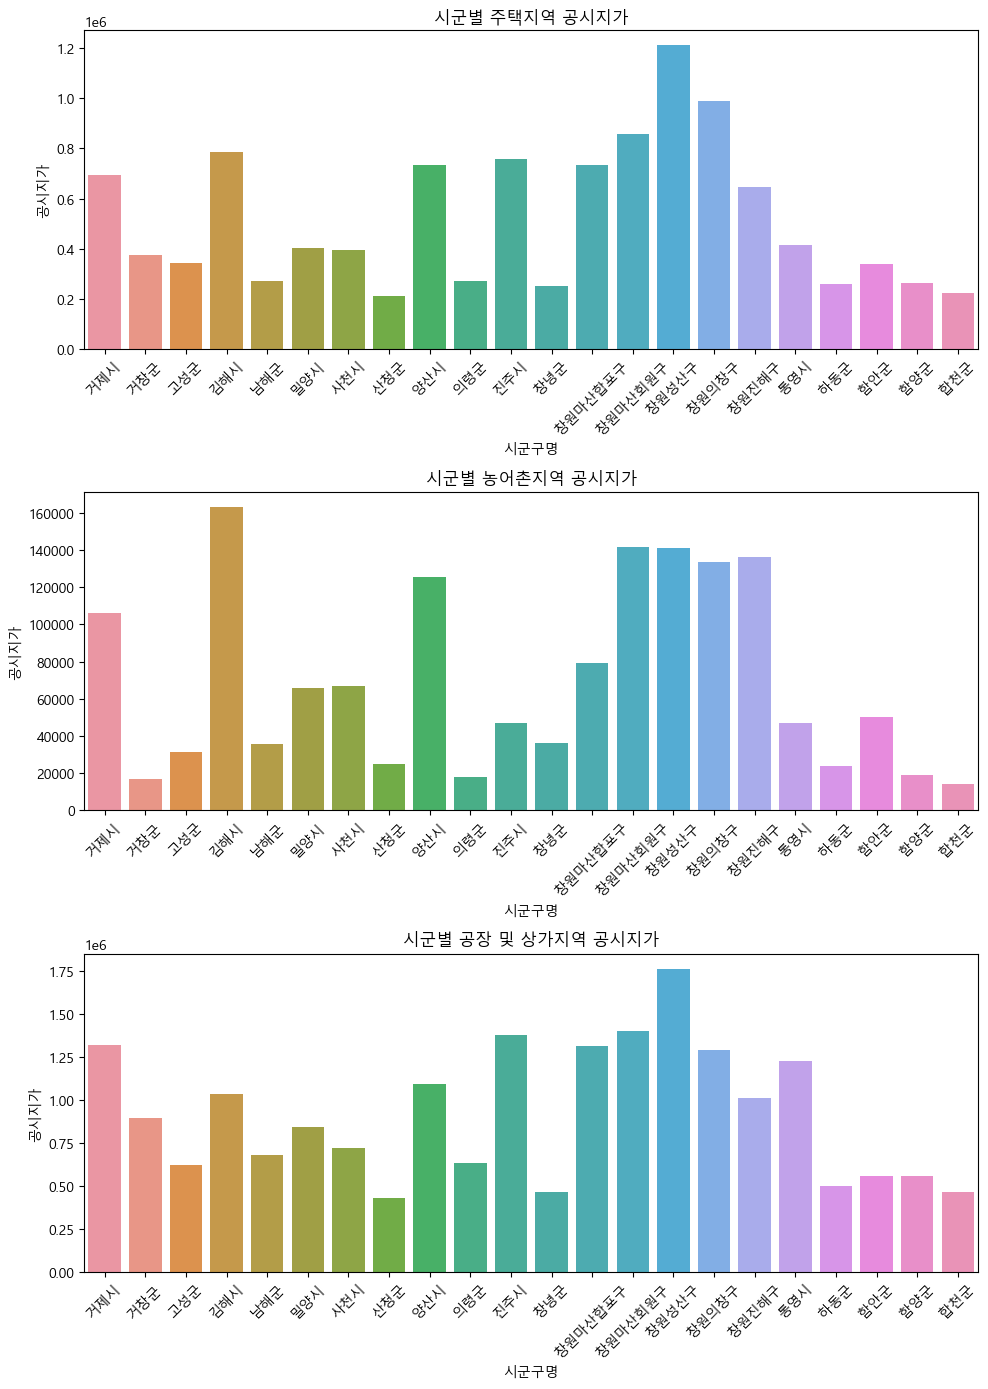

In [22]:
# 시군별 주위환경에 따른 공시지가
fig, axes = plt.subplots(3, figsize=(10, 14))

house = df[df['주위환경'].str.contains('주택|아파트')].groupby('시군구명')['공시지가'].mean().reset_index()

sns.barplot(data=house, x='시군구명', y='공시지가', ax=axes[0])
axes[0].set_title('시군별 주택지역 공시지가')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


country = df[df['주위환경'].str.contains('농촌|농경|산림|농어촌')].groupby('시군구명')['공시지가'].mean().reset_index()

sns.barplot(data=country, x='시군구명', y='공시지가', ax=axes[1])
axes[1].set_title('시군별 농어촌지역 공시지가')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


factory = df[df['주위환경'].str.contains('공장|상가|업무|산업')].groupby('시군구명')['공시지가'].mean().reset_index()

sns.barplot(data=factory, x='시군구명', y='공시지가', ax=axes[2])
axes[2].set_title('시군별 공장 및 상가지역 공시지가')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [23]:
# 지세명별 분포
fig = go.Figure(data=[go.Pie(labels=df['지세명'].unique(), values=df['지세명'].value_counts())])
fig.update_layout(width=700, height=400, title='지세명별 분포')
fig.show()

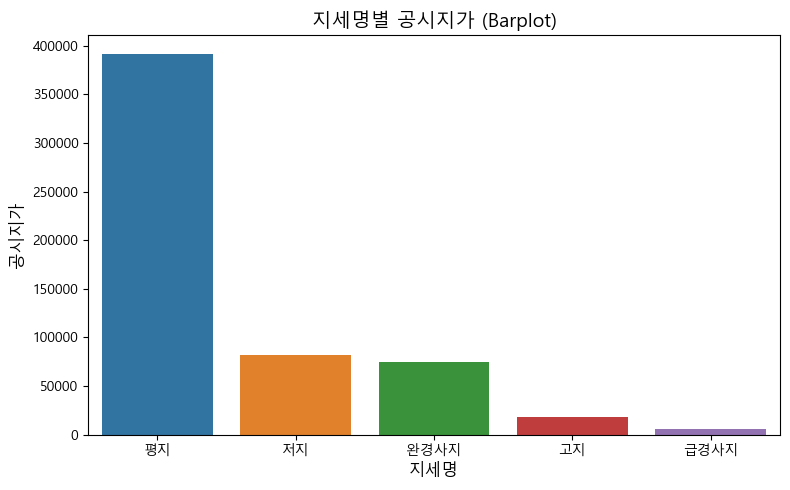

In [24]:
jise = df.groupby('지세명')['공시지가'].mean().sort_values(ascending=False)
jise_df = pd.DataFrame({'지세명': jise.index, '공시지가': jise.values})

fig, axes = plt.subplots(figsize=(8, 5))

# 막대 그래프 (Barplot)
sns.barplot(data=jise_df, x='지세명', y='공시지가')
plt.xlabel('지세명', fontsize=12)
plt.ylabel('공시지가', fontsize=12)
plt.title('지세명별 공시지가 (Barplot)', fontsize=14)

plt.tight_layout()
plt.show()


In [25]:
df['형상명'].unique()

array(['사다리형', '부정형', '세로장방형', '가로장방형', '정방형', '자루형'], dtype=object)

In [26]:
# 형상명별 분포
fig = go.Figure(data=[go.Pie(labels=df['형상명'].unique(), values=df['형상명'].value_counts())])
fig.update_layout(width=700, height=700, title='형상명별 분포')
fig.show()

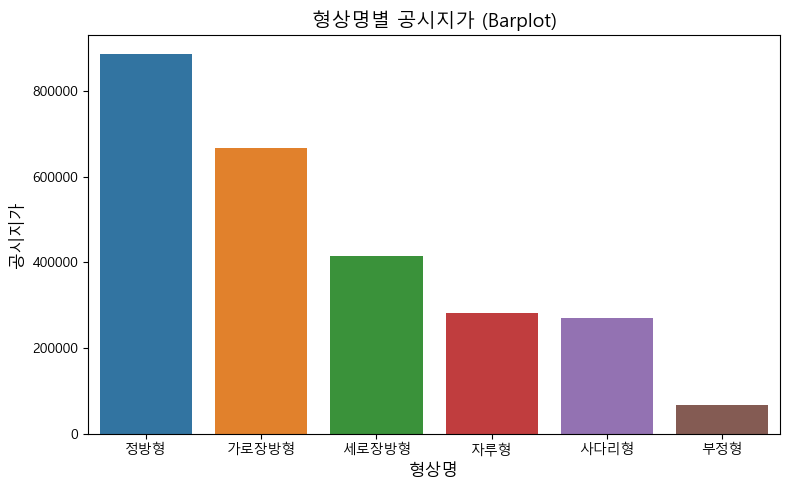

In [27]:
jise = df.groupby('형상명')['공시지가'].mean().sort_values(ascending=False)
jise_df = pd.DataFrame({'형상명': jise.index, '공시지가': jise.values})

fig, axes = plt.subplots(figsize=(8, 5))

# 막대 그래프 (Barplot)
sns.barplot(data=jise_df, x='형상명', y='공시지가')
plt.xlabel('형상명', fontsize=12)
plt.ylabel('공시지가', fontsize=12)
plt.title('형상명별 공시지가 (Barplot)', fontsize=14)

plt.tight_layout()
plt.show()


In [28]:
df['도로교통'].unique()

array(['소로한면', '세각(불)', '세로(불)', '소로각지', '세로(가)', '중로한면', '중로각지', '광대세각',
       '광대소각', '맹지', '광대한면', '세각(가)'], dtype=object)

In [29]:
# 도로교통별 분포
fig = go.Figure(data=[go.Pie(labels=df['도로교통'].unique(), values=df['도로교통'].value_counts())])
fig.update_layout(width=700, height=700, title='도로교통별 분포')
fig.show()

In [30]:
df.groupby('도로교통')['공시지가'].mean().sort_values(ascending=False)

도로교통
광대소각     1.639576e+06
광대한면     1.295409e+06
광대세각     1.240288e+06
중로각지     1.175694e+06
중로한면     9.381027e+05
소로각지     6.425484e+05
소로한면     4.616155e+05
세각(불)    2.022371e+05
세각(가)    1.801872e+05
세로(가)    1.368493e+05
세로(불)    9.784907e+04
맹지       3.136244e+04
Name: 공시지가, dtype: float64

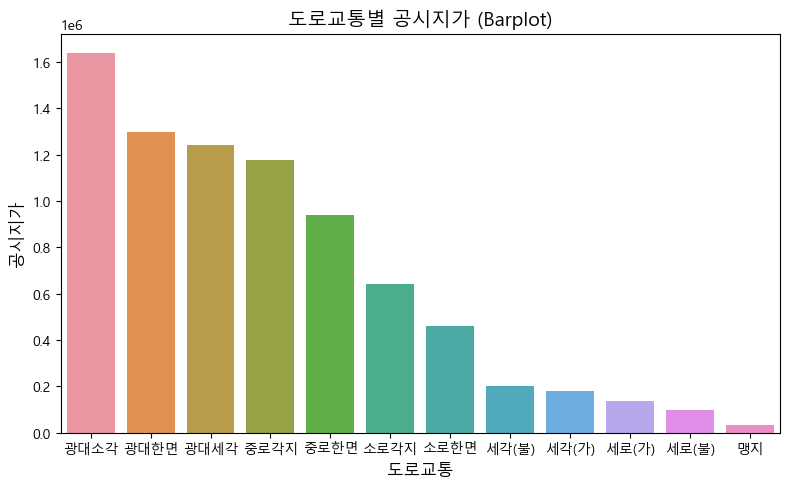

In [31]:
jise = df.groupby('도로교통')['공시지가'].mean().sort_values(ascending=False)
jise_df = pd.DataFrame({'도로교통': jise.index, '공시지가': jise.values})

fig, axes = plt.subplots(figsize=(8, 5))

# 막대 그래프 (Barplot)
sns.barplot(data=jise_df, x='도로교통', y='공시지가')
plt.xlabel('도로교통', fontsize=12)
plt.ylabel('공시지가', fontsize=12)
plt.title('도로교통별 공시지가 (Barplot)', fontsize=14)

plt.tight_layout()
plt.show()


In [32]:
df['방위'].unique()

array(['북향', '남향', '북서향', '동향', nan, '남서향', '남동향', '북동향', '서향'],
      dtype=object)

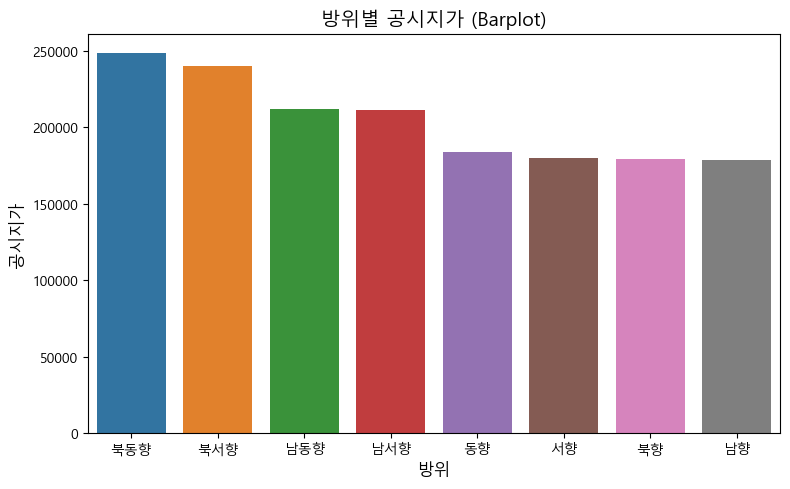

In [33]:
jise = df.groupby('방위')['공시지가'].mean().sort_values(ascending=False)
jise_df = pd.DataFrame({'방위': jise.index, '공시지가': jise.values})

fig, axes = plt.subplots(figsize=(8, 5))

# 막대 그래프 (Barplot)
sns.barplot(data=jise_df, x='방위', y='공시지가')
plt.xlabel('방위', fontsize=12)
plt.ylabel('공시지가', fontsize=12)
plt.title('방위별 공시지가 (Barplot)', fontsize=14)

plt.tight_layout()
plt.show()


In [34]:
# df.groupby([df['시군구명'].str.contains('창원')]).sum()
# df.groupby('시군구명')['공시지가'].sum()

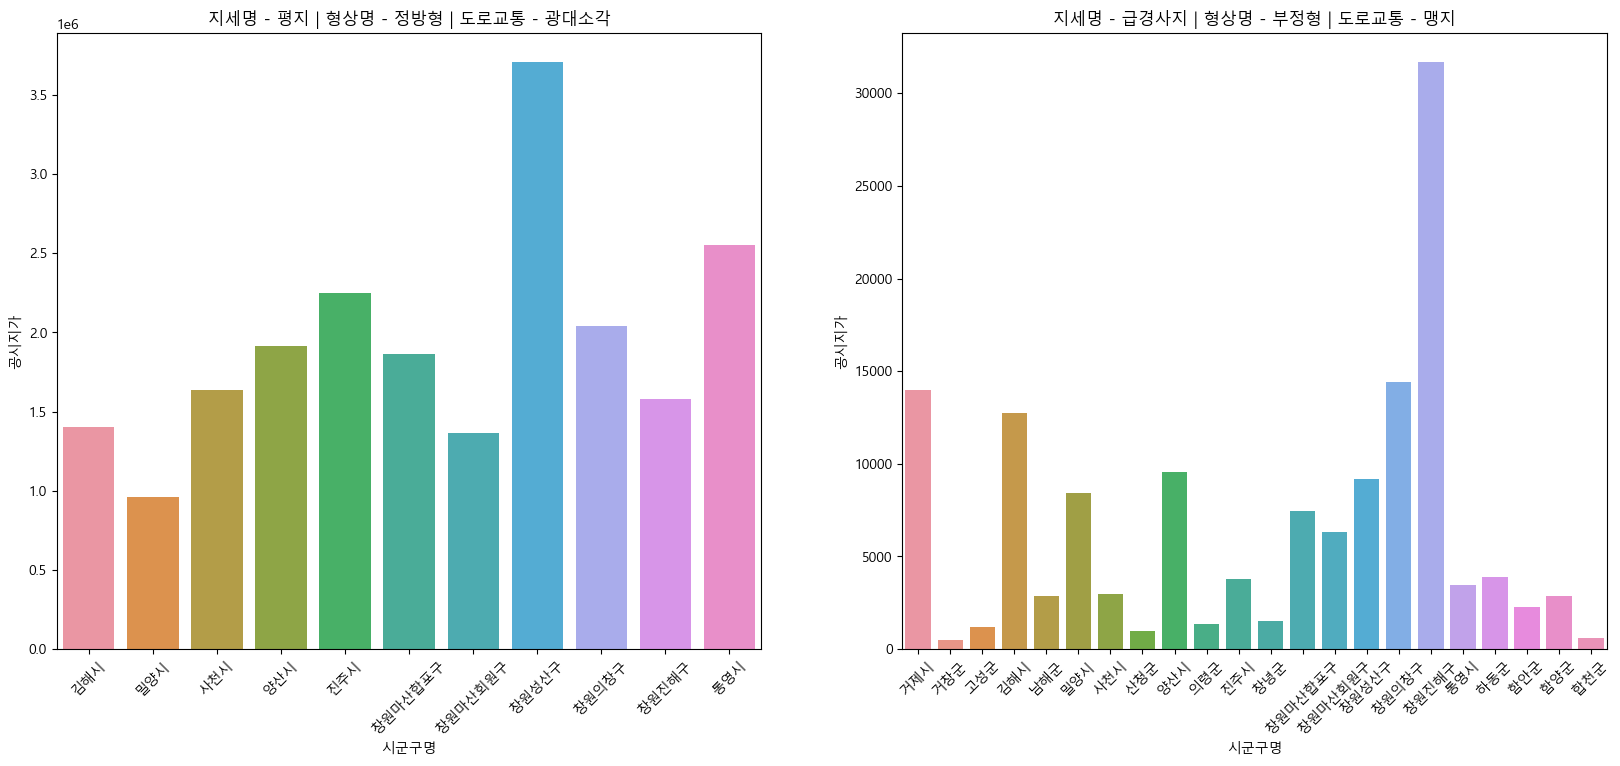

In [35]:
# 이상적 위치와 비선호 위치의 공시지가
good_place = df.loc[(df['지세명'] == '평지') & (df['형상명'] == '정방형') & (df['도로교통'] == '광대소각')].groupby('시군구명')['공시지가'].mean().reset_index()
bad_place = df.loc[(df['지세명'] == '급경사지') & (df['형상명'] == '부정형') & (df['도로교통'] == '맹지')].groupby('시군구명')['공시지가'].mean().reset_index()

# figure와 axes 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# 첫 번째 그래프
sns.barplot(data=good_place, x='시군구명', y='공시지가', ax=axes[0])
axes[0].set_title('지세명 - 평지 | 형상명 - 정방형 | 도로교통 - 광대소각')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# 두 번째 그래프
sns.barplot(data=bad_place, x='시군구명', y='공시지가', ax=axes[1])
axes[1].set_title('지세명 - 급경사지 | 형상명 - 부정형 | 도로교통 - 맹지')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()

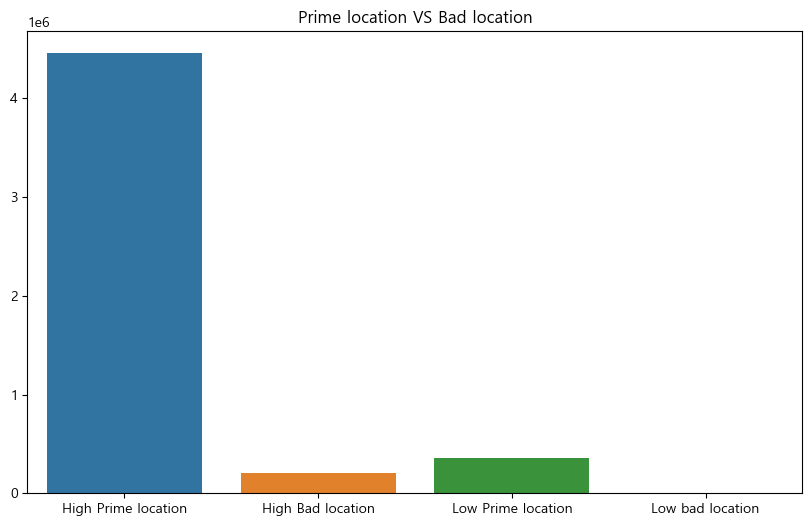

In [36]:
# 이상적 위치의 최고가와 최저가, 비선호 위치의 최고가와 최저가
good_place_top = df.loc[(df['지세명'] == '평지') & (df['형상명'] == '정방형') & (df['도로교통'] == '광대소각')]['공시지가'].max()
bad_place_top = df.loc[(df['지세명'] == '급경사지') & (df['형상명'] == '부정형') & (df['도로교통'] == '맹지')]['공시지가'].max()

good_place_bottom = df.loc[(df['지세명'] == '평지') & (df['형상명'] == '정방형') & (df['도로교통'] == '광대소각')]['공시지가'].min()
bad_place_bottom = df.loc[(df['지세명'] == '급경사지') & (df['형상명'] == '부정형') & (df['도로교통'] == '맹지')]['공시지가'].min()

plt.figure(figsize=(10, 6))
sns.barplot(x=['High Prime location', 'High Bad location', 'Low Prime location', 'Low bad location'], y=[good_place_top, bad_place_top, good_place_bottom, bad_place_bottom])
plt.title('Prime location VS Bad location')
plt.show()

In [37]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

address = df['시도명'] + " " + df['시군구명'] + " " + df['소재지']
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [38]:
most_good_plcae = df.loc[(df['지세명'] == '평지') & (df['형상명'] == '정방형') & (df['도로교통'] == '광대소각')].nlargest(1, '공시지가')
most_bad_place = df.loc[(df['지세명'] == '급경사지') & (df['형상명'] == '부정형') & (df['도로교통'] == '맹지')].nsmallest(1, '공시지가')
most_place = pd.concat([most_good_plcae, most_bad_place])
most_place

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
473393,경상남도,진주시,동성동 10-3,대,162.0,일반상업지역,NaN,상업용,도심 상가지대,평지,정방형,광대소각,4455000,중앙광장,서측인근,NaN
517776,경상남도,산청군,생초면 어서리 산70,임야,36198.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,맹지,285,하둔소류지,서측근거리,북동향


In [49]:
most_address = '진해구'+ ' ' + most_place['소재지']
for i in most_address:
    print(geocoding(i))

[0, 0]
[0, 0]


In [71]:
# 가장 이상적인 장소의 최고 공시지가 위치와 가장 비선호하는 장소의 최하 공시지가 위치
m = folium.Map(location=[35.24897225931964, 128.67639086457768], zoom_start=9, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [35.192567822567284, 128.0834100791663], popup="<i>진주시<br>중앙광장<br>4,455,000</i>", tooltip=tooltip, icon=folium.Icon(color="red", icon="info-sign")
).add_to(m)
folium.Marker(
    [35.50094084682632, 127.8212915303387], popup="<b>산청군<br>하둔소류지<br>285</b>", tooltip=tooltip, icon=folium.Icon(color="green", icon="ok-sign")
).add_to(m)

m

In [26]:
df.nlargest(5, '공시지가')
df.nsmallest(5, '공시지가')

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
517776,경상남도,산청군,생초면 어서리 산70,임야,36198.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,맹지,285,하둔소류지,서측근거리,북동향
517734,경상남도,산청군,오부면 왕촌리 산123,임야,49983.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,맹지,305,신촌소류지,남서측인근,남동향
516833,경상남도,하동군,옥종면 궁항리 산90,임야,53157.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,맹지,310,궁항저수지,남서측근거리,동향
517670,경상남도,산청군,오부면 일물리 산73-1,임야,13686.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,세로(불),310,안일물마을,서측인근,동향
519556,경상남도,산청군,신등면 간공리 산64,임야,25091.0,농림지역,NaN,자연림,순수 산림지대,급경사지,부정형,맹지,310,연산윗마을,북측원거리,남서향


In [27]:
# 경상남도에서 공시지가가 가장 높은 세 곳의 위치
m = folium.Map(location=[35.24897225931964, 128.67639086457768], zoom_start=9, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [35.44074878379521, 128.5899343039267], popup="<i>창녕군<br>레이크힐스리조트<br>25,200,000</i>", tooltip=tooltip, icon=folium.Icon(color="red", icon="info-sign")
).add_to(m)
folium.Marker(
    [35.69854046020846, 128.0227922875814], popup="<b>거창군<br>백두산천지온천<br>21,700,000</b>", tooltip=tooltip, icon=folium.Icon(color="green", icon="ok-sign")
).add_to(m)
folium.Marker(
    [35.22242499706855, 128.68480085737582], popup="<b>창원성산구<br>상남시장<br>6,775,000</b>", tooltip=tooltip, icon=folium.Icon(color="blue", icon="ok-sign")
).add_to(m)

m

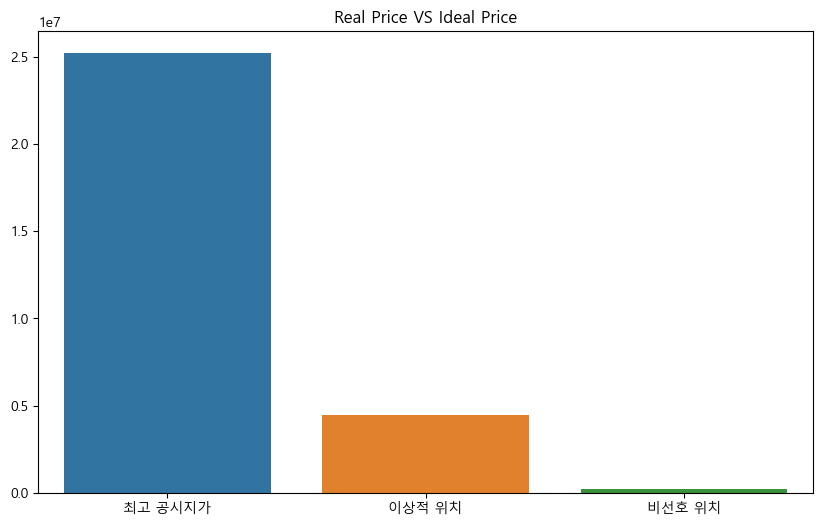

In [10]:

most_good_place = df.loc[(df['지세명'] == '평지') & (df['형상명'] == '정방형') & (df['도로교통'] == '광대소각')]['공시지가'].max()
most_bad_place = df.loc[(df['지세명'] == '급경사지') & (df['형상명'] == '부정형') & (df['도로교통'] == '맹지')]['공시지가'].max()
top = df['공시지가'].max()
bottom = df['공시지가'].min()

plt.figure(figsize=(10, 6))
sns.barplot(x=['최고 공시지가', '이상적 위치', '비선호 위치'], y=[top, most_good_place, most_bad_place])
plt.title('Real Price VS Ideal Price')
plt.show()


In [40]:
df.nlargest(5, '공시지가')

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,시군구그룹,총 공시가격
507094,경상남도,창녕군,부곡면 거문리 213-25,광천지,3.0,일반상업지역,NaN,광천지,온천지대,평지,정방형,맹지,25200000,레이크힐스리조트,내,NaN,창원을 제외한 경상남도,7.560000e+07
525071,경상남도,거창군,가조면 일부리 1301-1,광천지,3.3,계획관리지역,NaN,광천지,온천 관광지대,평지,정방형,맹지,21700000,백두산천지온천,내,NaN,창원을 제외한 경상남도,7.161000e+07
467461,경상남도,창원성산구,상남동 11-7,대,753.5,일반상업지역,NaN,상업용,도심 상가지대,평지,정방형,중로각지,6775000,상남시장,북동측인근,NaN,창원,5.104962e+09
473498,경상남도,진주시,대안동 14-1,대,170.2,일반상업지역,NaN,상업용,중심 상가지대,평지,세로장방형,광대소각,6630000,국민은행,서측인근,NaN,창원을 제외한 경상남도,1.128426e+09
473497,경상남도,진주시,대안동 13-3,대,126.3,일반상업지역,NaN,상업용,중심 상가지대,평지,사다리형,광대한면,6405000,중앙광장,북측인근,NaN,창원을 제외한 경상남도,8.089515e+08


In [52]:
# 주거지역의 공시가격이 가장 높은 다섯 곳
df[(df['지목'] == '대') & ((df['이용상황'] == '다세대') | (df['이용상황'] == '단독주택') | (df['이용상황'] == '아파트') | (df['이용상황'] == '주거나지'))].nlargest(5, '총 공시가격')

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,시군구그룹,총 공시가격
467452,경상남도,창원성산구,반림동 10,대,125627.0,제3종일반주거지역,준주거지역,아파트,아파트지대,평지,사다리형,광대소각,1895000,노블파크아파트,내,남서향,창원,2.380632e+11
465268,경상남도,창원의창구,중동 790,대,90960.0,제3종일반주거지역,NaN,아파트,아파트지대,평지,부정형,중로각지,1820000,창원과학고등학교,남동측인근,남향,창원,1.655472e+11
487233,경상남도,김해시,주촌면 천곡리 1531,대,164118.8,제3종일반주거지역,NaN,아파트,아파트지대,평지,부정형,중로한면,938500,김해센텀두산위브더제니스,내,동향,창원을 제외한 경상남도,1.540255e+11
467642,경상남도,창원성산구,용호동 70,대,59371.0,제2종전용주거지역,NaN,아파트,아파트지대,평지,사다리형,광대소각,2005000,용지 아이파크아파트,내,남동향,창원,1.190389e+11
467641,경상남도,창원성산구,용호동 63,대,53665.0,제2종전용주거지역,NaN,아파트,아파트지대,평지,가로장방형,광대소각,1880000,롯데아파트,내,남동향,창원,1.008902e+11


In [48]:
df['이용상황'].unique()

array(['다세대', '단독주택', '상업용', '상업기타', '주상용', '아파트', '전', '자연림', '업무용',
       '과수원', '주상기타', '주거나지', '공업나지', '공업용', '골프장_회원제', '상업나지', '기타',
       '주거기타', '터미널', '답', '전기타', '토지임야', '답창고', '전창고', '답기타', '답축사',
       '주상나지', '운동장등', '공업기타', '유해혐오', '주차장등', '연립주택', '유원지', '공원묘지',
       '공원등', '조림', '골프장_대중제', '휴게소', '임야기타', '목장용지', '콘도', '하천등', '공항',
       '태양광', '전축사', '경마장', '도로등', '야영', '승마장', '위험시설', '스키장', '광천지',
       '발전소'], dtype=object)

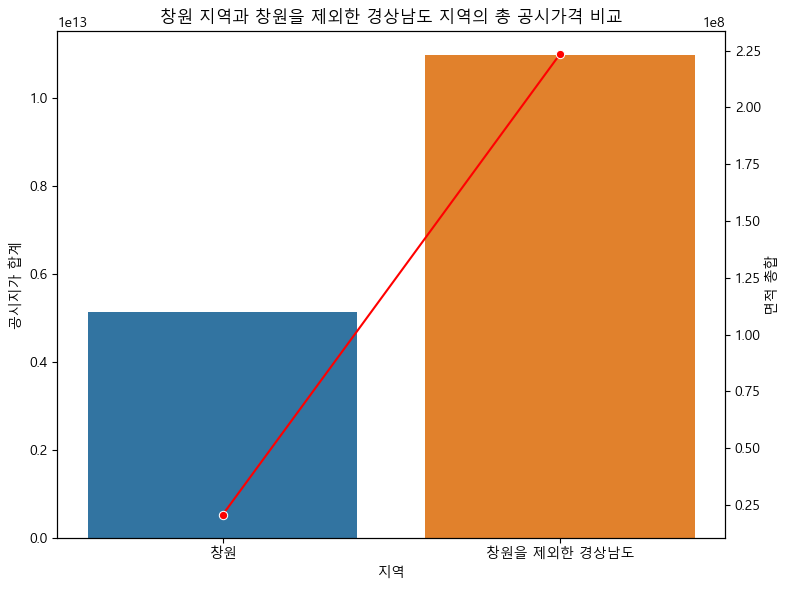

In [29]:
# 창원을 포함하는 지역을 하나로 묶기
df['시군구그룹'] = df['시군구명'].apply(lambda x: '창원' if '창원' in x else '창원을 제외한 경상남도')

# 각 행의 '면적'과 '공시지가'를 곱하여 '총 공시가격' 계산
df['총 공시가격'] = df['면적'] * df['공시지가']

# 시군구그룹별로 총 공시가격과 면적의 합계 계산
df_grouped = df.groupby('시군구그룹').agg({'총 공시가격': 'sum', '면적': 'sum'}).reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# 총 공시가격 막대 그래프
sns.barplot(data=df_grouped, x='시군구그룹', y='총 공시가격', ax=ax)
ax.set_xlabel('지역')
ax.set_ylabel('공시지가 합계')
ax.set_title('창원 지역과 창원을 제외한 경상남도 지역의 총 공시가격 비교')

# 면적 선 그래프
ax2 = ax.twinx()
sns.lineplot(data=df_grouped, x='시군구그룹', y='면적', color='red', marker='o', ax=ax2)
ax2.set_ylabel('면적 총합')

plt.tight_layout()
plt.show()

plt.show()

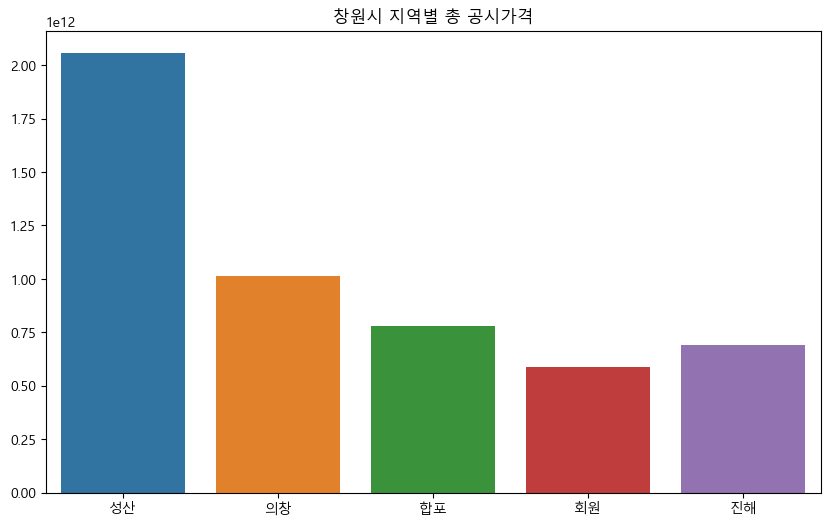

In [30]:
cw_sung = sum(df[df['시군구명'].str.contains('성산')]['공시지가'] * df[df['시군구명'].str.contains('성산')]['면적'])
cw_ui = sum(df[df['시군구명'].str.contains('의창')]['공시지가'] * df[df['시군구명'].str.contains('의창')]['면적'])
cw_hap = sum(df[df['시군구명'].str.contains('합포')]['공시지가'] * df[df['시군구명'].str.contains('합포')]['면적'])
cw_hoi = sum(df[df['시군구명'].str.contains('회원')]['공시지가'] * df[df['시군구명'].str.contains('회원')]['면적'])
cw_jin = sum(df[df['시군구명'].str.contains('진해')]['공시지가'] * df[df['시군구명'].str.contains('진해')]['면적'])

plt.figure(figsize=(10, 6))
sns.barplot(x=['성산', '의창', '합포', '회원', '진해'], y=[cw_sung, cw_ui, cw_hap, cw_hoi, cw_jin])
plt.title('창원시 지역별 총 공시가격')
plt.show()

In [31]:
sung = pd.DataFrame(columns=['성산구보다 작은 시군구', '성산구보다 작은 지역 총 공시가격'])

for i in df['시군구명'].unique():
    if '창원' not in i:
        total_price = sum(df[df['시군구명'] == i]['공시지가'] * df[df['시군구명'] == i]['면적'])
        if total_price < cw_sung:
            sung = pd.concat([sung, pd.DataFrame([[i, total_price]], columns=['성산구보다 작은 시군구', '성산구보다 작은 지역 총 공시가격'])], ignore_index=True)

sung


,성산구보다 작은 시군구,성산구보다 작은 지역 총 공시가격
0,진주시,1.255143e+12
1,통영시,4.595580e+11
2,사천시,6.758937e+11
3,밀양시,5.815646e+11
4,거제시,1.012284e+12
5,양산시,1.791775e+12
6,의령군,8.786435e+10
7,함안군,3.715941e+11
8,창녕군,2.812138e+11
9,고성군,2.642798e+11


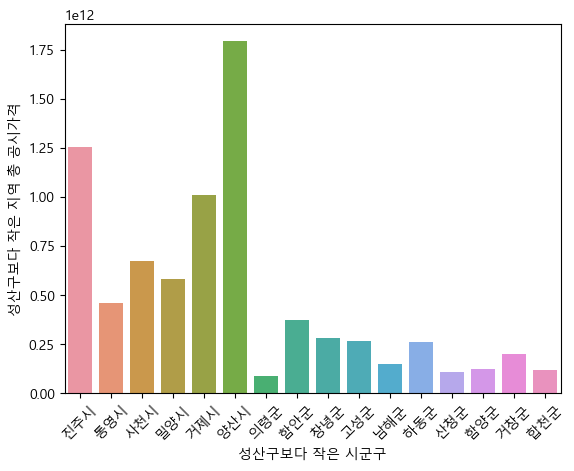

In [32]:
plt.figure()
sns.barplot(data=sung, x='성산구보다 작은 시군구', y='성산구보다 작은 지역 총 공시가격')
plt.xticks(rotation=45)
plt.show()